<a href="https://colab.research.google.com/github/jrebull/NLP/blob/main/Team18_MNA_NLP_semana_5_Actividad_Embeddings_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✨ **Actividad 3 5.2: Explorando Vectores Embebidos con OpenAI** ✨
## _Análisis Continuado de Datasets: Amazon, Yelp & IMDb - Semana 5 y 6_

---
---

## 🗓️ **Información General**
> **Fecha de Entrega:** Lunes, 26 de Mayo de 2025
>
> **Versión del Documento:** `vFinal`

---
---

## 👥 **Autores del Proyecto**

> #### 🙅🏼‍♀️ **Iris Monserrat Urbina Casas** `A01795999`
>
> #### 🙆🏼‍♂️ **Javier Augusto Rebull Saucedo** `A01795838`
>
> #### 🙆🏼‍♂️ **Juan Carlos Pérez Nava** `A01795941`
>
> #### 🙅🏼‍♀️ **Sihiní Trinidad Sánchez** `A00889358`

---
---

## 👨‍🏫 **Supervisión Académica**
> **Profesor Tutor:**
>
> Dr. Rodolfo Miguel Gameros Leal

> **Profesor Titular:**
>
> Dr. Luis Eduardo Falcón Morales

---
---

# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Actividad Semana 5 y Semana 6

### **Vectores Embebidos de OpenAI**

---


## 💡 Introducción

En la actividad de esta semana, trabajarás en equipos con el modelo de **vectores embebidos** de OpenAI.

Los actuales **Modelos de Lenguaje de Gran Escala (LLM)** son capaces de generar vectores embebidos para cada token, palabra o enunciado que les proporciones. Es crucial considerar que el **coste computacional** y de uso de **recursos** será un factor determinante al elegir qué modelo o aproximación utilizar.

Una forma inicial de trabajar con estos modelos preentrenados implica los siguientes pasos:

> 1.  Generar un **vocabulario** a partir de tu conjunto de datos de entrenamiento.
> 2.  Posteriormente, cada palabra de tu vocabulario se sustituye por su correspondiente **vector embebido** preentrenado.
> 3.  De manera predeterminada, cuando no exista un vector para una palabra en particular, se suele elegir el vector más cercano en términos de **similaridad coseno**, o bien, se puede optar por eliminar dicha palabra del análisis.

Existen diversas propuestas para utilizar estos **vectores embebidos** como entrada para modelos de aprendizaje automático. Cuando se trabaja con los vectores embebidos de cada palabra o token individual, una forma común de representar un enunciado completo es calculando el **vector promedio** de todos los vectores embebidos que lo componen.

🎯 En esta actividad, el objetivo principal será comparar el rendimiento de diferentes modelos de **aprendizaje automático** (machine learning) cuando se utilizan:
    * Vectores embebidos a nivel de palabra (promediados por enunciado).
    * Vectores embebidos aplicados directamente a los comentarios completos.

---

## 📖 Marco Teórico: Vectores Embebidos y Modelos de Lenguaje para el Análisis de Texto

El análisis de sentimientos y la clasificación de texto son tareas fundamentales en el **Procesamiento de Lenguaje Natural (PNL)**, con aplicaciones que van desde la comprensión de la opinión del cliente hasta la moderación de contenido. Tradicionalmente, se han utilizado enfoques basados en la frecuencia de palabras como **TF-IDF** (Term Frequency-Inverse Document Frequency). Sin embargo, estos métodos a menudo no capturan las relaciones semánticas matizadas entre palabras (Aggarwal, 2018).

### Vectores Embebidos de Palabras (Word Embeddings)

Los **vectores embebidos de palabras** (word embeddings) han representado un avance significativo al mapear palabras o frases de un vocabulario a vectores de números reales en un espacio de baja dimensión. Estos vectores están entrenados de tal manera que las palabras con significados similares se encuentran cerca en el espacio vectorial, permitiendo a los modelos capturar el contexto y la semántica (Mikolov et al., 2013a; Pennington et al., 2014). Modelos como **Word2Vec** (Mikolov et al., 2013a) y **GloVe** (Pennington et al., 2014) fueron pioneros en esta área, aprendiendo estos vectores a partir de grandes corpus de texto.

Una técnica común para representar un documento o enunciado a partir de los vectores embebidos de sus palabras es calcular el **vector promedio** de los vectores de todas las palabras que lo componen. Si bien es un método simple, ha demostrado ser una línea base robusta para diversas tareas de PNL (Aggarwal, 2018).

### Modelos de Lenguaje de Gran Escala (LLMs) y Embeddings Contextuales

Más recientemente, los **Modelos de Lenguaje de Gran Escala (LLMs)**, basados en la arquitectura **Transformer** (Vaswani et al., 2017), como los modelos de **OpenAI** (por ejemplo, la familia GPT), han llevado los embeddings a un nuevo nivel. Estos modelos pueden generar **embeddings contextuales**, lo que significa que la representación vectorial de una palabra puede cambiar según el contexto en el que aparece. Esto contrasta con los embeddings estáticos como Word2Vec, donde cada palabra tiene una única representación vectorial.

Los LLMs pueden generar embeddings para tokens, palabras individuales o enunciados completos. La elección del modelo y la granularidad del embedding (palabra vs. enunciado) pueden tener un impacto significativo en el rendimiento y el costo computacional (OpenAI, 2023). En esta actividad, se explorará el uso de los embeddings proporcionados por OpenAI para la tarea de clasificación de texto.

### Aplicación en Aprendizaje Automático

Una vez que el texto se convierte en representaciones vectoriales numéricas mediante embeddings, se pueden utilizar diversos algoritmos de **aprendizaje automático supervisado** para la clasificación. Modelos como la **regresión logística** y los **bosques aleatorios (random forests)** son opciones comunes y efectivas para este tipo de tareas, proporcionando un buen equilibrio entre interpretabilidad y rendimiento (James et al., 2013). La evaluación de estos modelos se realiza comúnmente utilizando métricas como la **exactitud (accuracy)** y el **reporte de clasificación**, que incluye precisión, recall y F1-score por clase.

---
---
# Definicion de librerias

In [1]:
# -------------------------------------------
# INSTALACIÓN DE PAQUETES EXTERNOS
# -------------------------------------------
!pip install contractions # Instala la librería 'contractions' para expandir contracciones del inglés (e.g., "don't" -> "do not").

# -------------------------------------------
# MANEJO Y ANÁLISIS DE DATOS
# -------------------------------------------
import pandas as pd # Librería fundamental para la manipulación y análisis de datos, usa estructuras como DataFrames.
import numpy as np  # Proporciona soporte para vectores y matrices grandes, junto con funciones matemáticas de alto nivel para operar con ellos.
import gdown        # Útil para descargar archivos directamente desde Google Drive.

# -------------------------------------------
# PROCESAMIENTO DE LENGUAJE NATURAL (NLP)
# -------------------------------------------
import re           # Módulo para trabajar con expresiones regulares, esencial para la limpieza y búsqueda de patrones en texto.
import contractions # Librería para expandir contracciones comunes en el idioma inglés (e.g., "I'm" -> "I am").
import nltk         # Natural Language Toolkit (NLTK), una de las bibliotecas más completas para tareas de NLP.

# Descarga de recursos específicos de NLTK (solo se necesita ejecutar una vez por entorno)
nltk.download('stopwords', quiet=True) # Descarga la lista de palabras vacías (stopwords) para varios idiomas.
nltk.download('wordnet', quiet=True)   # Descarga WordNet, una gran base de datos léxica del inglés, útil para lematización y sinónimos.
nltk.download('punkt', quiet=True)     # Descarga el tokenizador 'punkt', necesario para dividir texto en frases y palabras.

from nltk.corpus import stopwords       # Módulo para acceder a listas de palabras vacías (artículos, preposiciones, etc.).
from nltk.corpus import wordnet         # Módulo para interactuar con la base de datos léxica WordNet.
from nltk.stem import WordNetLemmatizer # Herramienta para realizar la lematización, reduciendo palabras a su forma base o lema.

# -------------------------------------------
# MACHINE LEARNING Y EVALUACIÓN DE MODELOS
# -------------------------------------------
from sklearn.model_selection import train_test_split # Función para dividir conjuntos de datos en subconjuntos de entrenamiento y prueba.
from sklearn.linear_model import LogisticRegression  # Implementa el algoritmo de Regresión Logística para clasificación.
from sklearn.ensemble import RandomForestClassifier  # Implementa el algoritmo de Bosques Aleatorios (Random Forest) para clasificación.
from sklearn.metrics import confusion_matrix         # Calcula la matriz de confusión para evaluar el rendimiento de un modelo de clasificación.
from sklearn.metrics import classification_report    # Genera un reporte con las principales métricas de clasificación (precisión, recall, F1-score).

# -------------------------------------------
# UTILIDADES ESTÁNDAR DE PYTHON Y COLECCIONES
# -------------------------------------------
import os                       # Proporciona funciones para interactuar con el sistema operativo (manejo de archivos, directorios, etc.).
from collections import Counter # Clase para contar la frecuencia de elementos en una colección (e.g., palabras en un texto).
import pickle                   # Módulo para la serialización y deserialización de objetos Python (guardar y cargar modelos, datos, etc.).

# -------------------------------------------
# VISUALIZACIÓN DE DATOS Y FORMATO
# -------------------------------------------
import matplotlib.pyplot as plt # Principal librería para la creación de gráficos y visualizaciones estáticas, interactivas y animadas.
import seaborn as sns           # Basada en matplotlib, proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos.
from tabulate import tabulate   # Librería para crear tablas formateadas y legibles a partir de datos tabulares.

print('\n\n')
print("📚✅ ¡Librerías cargadas y listas para la acción! 🚀")
print('\n\n')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.1 MB/s eta 0:00:00



📚✅ ¡Librerías cargadas y listas para la acción! 🚀





---
## 📚 Definición de Librerías y Acceso a la API de OpenAI

En esta sección, se importarán las librerías necesarias para el proyecto y se configurará el acceso a la API de OpenAI.

> ⚠️ **Nota Importante:** Por razones de seguridad y para facilitar la reproducibilidad en el entorno de Google Colab, las claves de API (API keys) de OpenAI han sido omitidas en este notebook. Originalmente, se definieron en esta parte del código para su uso.

---

In [2]:
# Incluye las celdas necesarias para tu acceso a la API de OpenAI.

# -------------------------------------------
# IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN
# -------------------------------------------
from google.colab import userdata # Para acceder a 'secrets' (como API keys) guardados en Colab.
from openai import OpenAI # Cliente oficial de Python para la API de OpenAI (versión más reciente).
import openai # Importa el módulo principal de la librería OpenAI (usado en versiones anteriores o para acceso a nivel de módulo).
import tiktoken # Librería utilizada para contar y manejar tokens de modelos de OpenAI.





---
---

## 1️⃣ **Pregunta - 1**

### 1. **Generación del DataFrame a partir de los archivos:**

1. **Descarga de los archivos:**  
   Descarga los 3 archivos de **Canvas**:  
   - `amazon5.txt`
   - `imdb5.txt`
   - `yelp5.txt`

2. **Creación del DataFrame:**  
   Genera un solo **DataFrame de Pandas** combinando los tres archivos.

3. **Verificación de los registros:**  
   Verifica que tienes **3000 registros** en el DataFrame, con sus respectivas etiquetas.  
   En particular, el archivo de datos de IMDb ya no requiere transformación para obtener sus 1000 registros.

---


Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.




In [22]:
# --- 1. Creación del Directorio de Datos ---
output_directory = 'datos'
if not os.path.exists(output_directory):
    os.makedirs(output_directory, exist_ok=True) # Crea el directorio si no existe; exist_ok=True evita error si ya existe
    print(f"Directorio '{output_directory}' creado exitosamente.")
else:
    print(f"El directorio '{output_directory}' ya existe.")

# --- 2. Definición de URLs y Nombres de Archivos para Descarga ---
files_to_download = [
    {'url': 'https://drive.google.com/uc?id=1HW2IsfUBLeIHpkRsRcy4xoU1UVwL419a', 'filename': 'amazon5.txt', 'dataset_name': 'Amazon'},
    {'url': 'https://drive.google.com/uc?id=1xGRzo6Epj-ix1kzJUAeMRB2iwqR3FnTc', 'filename': 'imdb5.txt',   'dataset_name': 'IMDb'},
    {'url': 'https://drive.google.com/uc?id=1AJ4uy5iQPoq7Pm2ZNSr0pS8UBQqquxwj', 'filename': 'yelp5.txt',   'dataset_name': 'Yelp'},
    {'url': 'https://drive.google.com/uc?id=1nNNItqMXkG6cjPqR2fbAXGu2-N5iwqzV', 'filename': 'embeddings_diccionario_large.pkl',   'dataset_name': 'embeddings_large'}, #text-embedding-3-large
    {'url': 'https://drive.google.com/uc?id=18lZgJQGETcgAtD48RlPGvTdImqNBm7wL', 'filename': 'embeddings_diccionario_p10.pkl',   'dataset_name': 'embeddings_p10'}, #text-embedding-3-large
    {'url': 'https://drive.google.com/uc?id=10fnLXgpakF6-MyA6K_vrN_xUk2-CNX1q', 'filename': 'embeddings_diccionario_small.pkl',   'dataset_name': 'embeddings_small'} #text-embedding-3-small


]

# --- 3. Proceso de Descarga de Archivos ---
print("\nIniciando la descarga de datos...")
all_downloads_successful = True
for item in files_to_download:
    output_path = os.path.join(output_directory, item['filename'])
    print(f"Descargando {item['dataset_name']} ({item['filename']})...")
    try:
        gdown.download(item['url'], output_path, quiet=False)
    except Exception as e:
        print(f"Ocurrió un error durante la descarga de {item['filename']}: {e}")
        all_downloads_successful = False

if all_downloads_successful:
    print(f"\n✅ Descarga de todos los archivos completada. Guardados en '{output_directory}'.")
else:
    print(f"\n⚠️ Algunos archivos no pudieron ser descargados. Revisa los mensajes de error.")


# --- 4. Carga de Datos en DataFrames de Pandas ---
print("\n\n\nCargando datos en DataFrames...")
try:
    # Carga Amazon: delimitado por tabulador, sin encabezado, columnas 'review' y 'label'
    dfa = pd.read_csv(os.path.join(output_directory, 'amazon5.txt'),
                      sep='\t', names=['review','label'], header=None, encoding='utf-8')

    # Carga IMDb: delimitado por 2 o más espacios (regex), sin encabezado, columnas 'review' y 'label'
    # Se usa engine='python' para separadores regex complejos y evitar warnings.
    dfi = pd.read_csv(os.path.join(output_directory, 'imdb5.txt'),
                      sep=' {2,}', names=['review','label'], header=None, encoding='utf-8', engine='python')

    # Carga Yelp: delimitado por tabulador, sin encabezado, columnas 'review' y 'label'
    dfy = pd.read_csv(os.path.join(output_directory, 'yelp5.txt'),
                      sep='\t', names=['review','label'], header=None, encoding='utf-8')

    # --- 5. Combinación de DataFrames ---
    # Concatena los DataFrames individuales en uno solo, reiniciando el índice.
    df = pd.concat([dfa, dfi, dfy], ignore_index=True)
    print(f"\n✅ DataFrames cargados y combinados. Total de filas: {len(df)}")

except FileNotFoundError as e:
    print(f"❌ Error al cargar archivo: {e}. Asegúrate de que los archivos se descargaron correctamente.")
except Exception as e:
    print(f"❌ Ocurrió un error inesperado durante la carga de datos: {e}")


# *********** Aquí termina la sección de agregar código *************

El directorio 'datos' ya existe.

Iniciando la descarga de datos...
Descargando Amazon (amazon5.txt)...


Downloading...
From: https://drive.google.com/uc?id=1HW2IsfUBLeIHpkRsRcy4xoU1UVwL419a
To: /content/datos/amazon5.txt
100%|██████████| 58.2k/58.2k [00:00<00:00, 68.5MB/s]


Descargando IMDb (imdb5.txt)...


Downloading...
From: https://drive.google.com/uc?id=1xGRzo6Epj-ix1kzJUAeMRB2iwqR3FnTc
To: /content/datos/imdb5.txt
100%|██████████| 86.0k/86.0k [00:00<00:00, 74.3MB/s]


Descargando Yelp (yelp5.txt)...


Downloading...
From: https://drive.google.com/uc?id=1AJ4uy5iQPoq7Pm2ZNSr0pS8UBQqquxwj
To: /content/datos/yelp5.txt
100%|██████████| 61.3k/61.3k [00:00<00:00, 63.8MB/s]


Descargando embeddings_large (embeddings_diccionario_large.pkl)...


Downloading...
From: https://drive.google.com/uc?id=1nNNItqMXkG6cjPqR2fbAXGu2-N5iwqzV
To: /content/datos/embeddings_diccionario_large.pkl
100%|██████████| 89.3M/89.3M [00:01<00:00, 47.4MB/s]


Descargando embeddings_p10 (embeddings_diccionario_p10.pkl)...


Downloading...
From: https://drive.google.com/uc?id=18lZgJQGETcgAtD48RlPGvTdImqNBm7wL
To: /content/datos/embeddings_diccionario_p10.pkl
100%|██████████| 82.7M/82.7M [00:01<00:00, 54.3MB/s]


Descargando embeddings_small (embeddings_diccionario_small.pkl)...


Downloading...
From: https://drive.google.com/uc?id=10fnLXgpakF6-MyA6K_vrN_xUk2-CNX1q
To: /content/datos/embeddings_diccionario_small.pkl
100%|██████████| 44.7M/44.7M [00:01<00:00, 38.7MB/s]


✅ Descarga de todos los archivos completada. Guardados en 'datos'.



Cargando datos en DataFrames...

✅ DataFrames cargados y combinados. Total de filas: 3000


In [4]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [5]:
# Y veamos sus primeros registros:

df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [6]:
# Y veamos sus últimos registros:

df.tail()

,review,label
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0
2999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
# Muestra 20 filas seleccionadas de forma aleatoria del DataFrame
df.sample(n=20)

,review,label
2986,Shrimp- When I unwrapped it (I live only 1/2 a...,0
2747,I always order from the vegetarian menu during...,1
542,"Perhaps my phone is defective, but people cann...",0
2938,"The meat was pretty dry, I had the sliced bris...",0
2007,The potatoes were like rubber and you could te...,0
2251,There is nothing privileged about working/eati...,0
1317,The telephone repair man was really funny and ...,1
1524,Full of unconvincing cardboard characters it i...,0
1910,I highly doubt that anyone could ever like thi...,0
1205,I really don't see how anyone could enjoy this...,0


---
---

# 2️⃣ **Pregunta - 2:**

2. Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado a todos los
comentarios. Llama Xclean a los comentarios procesados y Y a las etiquetas.

Realiza el proceso de limpieza. Aplica el preprocesamiento que consideres adecuado.











In [8]:

# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********
X = df['review']
Y = df['label']

stopwords_engl = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean(texto):

  # 1️⃣ Normalizar a minúsculas
  text = texto.lower()

  # 2️⃣ Conservar solo letras y apóstrofes; colapsar espacios múltiples
  text = re.sub(r"[^a-z']", " ", text)
  text = re.sub(r"\s{2,}", " ", text).strip()

  # 3️⃣ Tokenización inicial por espacios
  tokens = text.split()

  # 4️⃣ Expandir contracciones (requiere módulo 'contractions')
  tokens = [contractions.fix(tok) for tok in tokens]

  # 5️⃣ División secundaria (por si quedaron sub-tokens)
  tokens =   tokens = " ".join(tokens).split()


  # 6️⃣ Eliminar apóstrofes remanentes y otros símbolos
  tokens = [re.sub(r"[^a-z]", "", tok) for tok in tokens]


  # 7️⃣ Filtrar stopwords y tokens muy cortos
  tokens = [tok for tok in tokens if tok not in stopwords_engl and len(tok) > 1]

  return tokens

def clean_doc(doc):

  # Inicializa el lematizador de WordNet
  lemmatizer = WordNetLemmatizer()

  # 1️⃣ Aplica lematización a cada palabra en el documento
  tokens = [lemmatizer.lemmatize(
            lemmatizer.lemmatize(
            lemmatizer.lemmatize(palabra,
            # 2️⃣ Primera lematización, tratando la palabra como verbo
            pos='v'),
            # 3️⃣ Luego, lematiza considerando la palabra como un sustantivo
            pos='n'),
            # 4️⃣Finalmente, lematiza considerando la palabra como un adjetivo
            pos='a')
            # Itera sobre cada palabra en el documento, asegurando que no sea vacía
            for palabra in doc if palabra ]

  # 5️⃣ Filtrar stopwords y tokens muy cortos
  tokens = [tok for tok in tokens if tok not in stopwords_engl and len(tok) > 1]

  return tokens

Xcleantok = [clean(x) for x in X]
Xclean = [clean_doc(x) for x in Xcleantok]

# *********** Aquí termina la sección de agregar código *************

In [9]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:5]:
  print(x)


['way', 'plug', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tie', 'charger', 'conversation', 'last', 'minute', 'major', 'problem']
['mic', 'great']


---
---

# 3️⃣ **Pregunta - 3:**

### 3. Partición aleatoria de los datos:

1. **Realización de la partición:**  
   Realiza una partición aleatoria de los datos utilizando los mismos porcentajes que en la práctica de la semana pasada para poder comparar los resultados con los de esta actividad. Los porcentajes serán:
   - **Entrenamiento:** 70%
   - **Validación:** 15%
   - **Prueba:** 15%

2. **Verificación de registros:**  
   Verifica que obtienes:
   - **2100 registros** para el conjunto de entrenamiento.
   - **450 registros** para cada uno de los conjuntos de validación y prueba.

3. **Uso de semilla:**  
   Utiliza una semilla para la partición de los datos.

---



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [10]:

# ************* Inicia la sección de agregar código:*****************************

# ——————————————————————————
# 1️⃣ Partición inicial: 70% train, 30% (val + test)
# ——————————————————————————

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(
    Xclean,               # Lista de comentarios procesados
    Y,                    # Serie de etiquetas
    train_size=0.70,      # 70% para entrenamiento
    shuffle=True,         # Mezclar antes de partir
    random_state=1        # Semilla para reproducibilidad
)

# ——————————————————————————
# 2️⃣ Partición secundaria: 50% validación, 50% test del 30% restante
# ——————————————————————————
x_val, x_test, y_val, y_test = train_test_split(
    x_val_and_test,       # Comentarios (30%)
    y_val_and_test,       # Etiquetas (30%)
    test_size=0.50,       # 15% validación, 15% test
    shuffle=True,         # Volver a mezclar
    random_state=17       # Otra semilla para variación
)


# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


---
---

# 4️⃣ **Pregunta - 4:**

### 4. Construye tu vocabulario a continuación:

1. **Uso del conjunto de entrenamiento:**  
   Utiliza el conjunto de entrenamiento para generar tu vocabulario con un tamaño que consideres adecuado. Si lo deseas, puedes filtrar tu vocabulario por:
   - Frecuencia mínima de uso de cada palabra.
   - Longitud mínima en caracteres.

2. **Tamaño del vocabulario:**  
   Indica el tamaño del vocabulario que generaste.

3. **Razón para usar solo el conjunto de entrenamiento:**  
   Explica por qué debe usarse únicamente el conjunto de entrenamiento para generar el vocabulario.

4. **Filtrado de conjuntos:**  
   Con el vocabulario generado, filtra los conjuntos de entrenamiento, validación y prueba para que todos los comentarios utilicen solo las palabras de este vocabulario.

---

Hasta este punto, básicamente has realizado transformaciones similares a las de la semana pasada, las cuales son válidas para muchos procesos dentro del análisis de textos. Ahora, procederemos con los vectores embebidos de cada palabra en cada comentario, en lugar de los vectores generados con las matrices Tf-idf.




Construye tu vocabulario a continuación


In [11]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:


# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********

midiccionario = Counter()  # Inicializar Counter vacío

# Iterar sobre cada lista de tokens de entrenamiento y actualizar conteos
for idx, tokens in enumerate(x_train, start=1):
    # idx: número de comentario procesado
    # tokens: lista de tokens para este comentario
    midiccionario.update(tokens)


# *********** Aquí termina la sección de agregar código *************

In [12]:
# b.	Indica el tamaño del vocabulario generado.

print('Longitud del vocabulario generado:')


# ******* Inicia la sección de agregar código: ***********


print(f"🔹 Longitud del diccionario (vocabulario): {len(midiccionario)} palabras únicas\n")

print("🔸 Top 10 palabras más frecuentes (palabra, frecuencia):")
for word, freq in midiccionario.most_common(10):
    print(f"   • {word}: {freq}")


# *********** Aquí termina la sección de agregar código *************

Longitud del vocabulario generado:
🔹 Longitud del diccionario (vocabulario): 3227 palabras únicas

🔸 Top 10 palabras más frecuentes (palabra, frecuencia):
   • good: 202
   • great: 141
   • movie: 140
   • phone: 134
   • film: 130
   • work: 113
   • bad: 112
   • like: 101
   • time: 101
   • one: 100


c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?


### ++++++++ Inicia la sección de agregar texto: +++++++++++

Para evitar filtrado de información y mantener una evaluación justa. Ya que de lo contrario se estarían incorporando datos al modelo que no debería haber "visto" aún, por otro lado simula mejor un ambiente de producción, donde el modelo evaluara nuevos comentarios nuevos.

### ++++++++ Termina la sección de agregar texto: +++++++++++


In [13]:
# d.  Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.

# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********

# 1️⃣ Definir la frecuencia mínima para incluir un token en el vocabulario
min_freq = 1

# 2️⃣ Filtrar tokens con frecuencia ≥ min_freq
midicc = {
    token: freq
    for token, freq in midiccionario.items()
    if freq >= min_freq
}

# 3️⃣ (Opcional) Ordenar el vocabulario por frecuencia descendente
midicc = dict(sorted(midicc.items(), key=lambda item: item[1], reverse=True))

print(f"Total de palabras registradas en el diccionario: {len(midicc):,}")

train_x = []
for ss in x_train:
    # ss: lista de tokens de un comentario
    # Conservar solo tokens que existen en midicc (frecuencia >= min_freq)
    train_x.append([w for w in ss if w in midiccionario])

# 🔍 Conjunto de validación
val_x = []
for ss in x_val:
    # Mismo proceso de filtrado para validación
    val_x.append([w for w in ss if w in midiccionario])

# 🧪 Conjunto de prueba
test_x = []
for ss in x_test:
    # Mismo proceso de filtrado para test
    test_x.append([w for w in ss if w in midiccionario])



# *********** Aquí termina la sección de agregar código *************

Total de palabras registradas en el diccionario: 3,227


In [14]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

['co', 'star', 'fare', 'much', 'good', 'people', 'like', 'morgan', 'freeman', 'jonah', 'hill', 'ed', 'helm', 'waste']
['tonight', 'elk', 'filet', 'special', 'suck']
['pay', 'bill', 'tip', 'felt', 'server', 'terrible', 'job']
['call', 'steakhouse', 'cannot', 'properly', 'cook', 'steak', 'understand']
['however', 'keypad', 'tinny', 'sometimes', 'reach', 'wrong', 'button']


---
---


# 5️⃣ **Pregunta - 5:**

###  ++++++++ Inicia la sección de agregar texto: +++++++++++

## Modelos de Vectores Embebidos de OpenAI

OpenAI ha desarrollado varios modelos para generar vectores embebidos, cada uno con características y optimizaciones específicas. Estos embeddings son fundamentales para tareas que requieren la comprensión semántica del texto, como búsqueda, agrupación, recomendación y clasificación (OpenAI, n.d.-a). A continuación, se presenta una comparación de los modelos más recientes y el anterior `text-embedding-ada-002`.

### Tabla Comparativa de Modelos de Embeddings de OpenAI

| Característica             | `text-embedding-ada-002`                     | `text-embedding-3-small`                    | `text-embedding-3-large`                    |
| :------------------------- | :------------------------------------------- | :------------------------------------------ | :------------------------------------------ |
| **Generación** | Segunda                                      | Tercera                                     | Tercera                                     |
| **Dimensiones del Vector** | 1536                                         | 1536 (predeterminado), 512                  | 3072 (predeterminado), 1024, 256            |
| **Máx. Tokens de Entrada** | 8191                                         | 8191                                        | 8191                                        |
| **Optimización Principal** | Costo-efectividad, buen rendimiento general  | Balanceado: costo y rendimiento mejorados   | Máximo rendimiento, mayor dimensionalidad   |
| **Características Clave** | Modelo popular y ampliamente utilizado      | Soporte para MRL (Matryoshka Representation Learning) para acortar embeddings sin perder mucha información; rendimiento mejorado sobre `ada-002` (OpenAI, n.d.-b). | Soporte para MRL; el modelo más potente de la tercera generación con el mejor rendimiento en benchmarks como MTEB (OpenAI, n.d.-c). |
| **Rendimiento (MTEB)** | 61.0% (Inglés)                               | 62.3% (Inglés)                              | 64.6% (Inglés)                              |
| **Costo (por 1k tokens)** | \$0.0001                                     | \$0.00002                                   | \$0.00013                                   |
| **Casos de Uso Sugeridos** | Búsqueda semántica, clasificación, agrupación de texto, análisis de sentimiento. | Tareas que requieren un buen balance entre rendimiento y costo, aplicaciones a gran escala. | Aplicaciones que demandan la más alta precisión en la representación semántica, análisis de texto complejo. |

*Fuente: Información adaptada de la documentación oficial de OpenAI (OpenAI, n.d.-a; OpenAI, n.d.-b; OpenAI, n.d.-c).*

### Resumen Adicional

* **`text-embedding-ada-002`**: Ha sido el modelo de embedding de segunda generación más capaz y rentable de OpenAI, ofreciendo un sólido rendimiento en una amplia gama de tareas de PNL. Es conocido por su buena calidad en la representación semántica y eficiencia (OpenAI, n.d.-d).

* **`text-embedding-3-small`**: Es una opción más eficiente y económica de la nueva generación de modelos de embedding. A pesar de su tamaño reducido y costo significativamente menor, supera a `text-embedding-ada-002` en benchmarks estándar como MIRACL y MTEB. Introduce la flexibilidad de dimensiones mediante la técnica de Matryoshka Representation Learning (MRL), permitiendo a los desarrolladores acortar los embeddings (por ejemplo, a 512 dimensiones) para optimizar velocidad y almacenamiento, aunque con una ligera pérdida de precisión (OpenAI, n.d.-b).

* **`text-embedding-3-large`**: Es el modelo de embedding de tercera generación más grande y potente de OpenAI hasta la fecha. Ofrece la mejor precisión y rendimiento en los benchmarks, superando a `text-embedding-3-small`. Al igual que la versión `small`, soporta MRL, lo que permite generar embeddings de dimensiones variables (por ejemplo, 3072, 1024, o 256) según las necesidades de la aplicación. Aunque es más costoso que `text-embedding-3-small`, su rendimiento superior lo hace ideal para tareas donde la calidad de la representación semántica es crítica (OpenAI, n.d.-c).

La elección del modelo dependerá de los requisitos específicos de la tarea, incluyendo la precisión deseada, el presupuesto y las limitaciones computacionales. Los modelos de tercera generación (`text-embedding-3-small` y `text-embedding-3-large`) ofrecen mejoras significativas en rendimiento y flexibilidad, como la capacidad de trabajar con dimensiones de embedding variables (OpenAI, n.d.-a).

---

Todos estos embeddings aceptan únicamente texto como entrada. Son modelos que transforman el texto en representaciones vectoriales.

- **text-embedding-3-small**: Es una versión mejorada con mayor rendimiento que el modelo Ada.
- **text-embedding-3-large**: Es el más potente para tareas en inglés y otros idiomas.
- **text-embedding-ada-002**: Es una versión optimizada con mejor rendimiento que el modelo embedding Ada.


<table>
  <tr>
    <th>Característica</th>
    <th>text-embedding-3-small</th>
    <th>text-embedding-3-large</th>
    <th>text-embedding-ada-002</th>
  </tr>
  <tr>
    <td>Rendimiento</td>
    <td>Bueno 🟢🟢</td>
    <td>Mejor 🟢🟢🟢</td>
    <td>Inferior 🟢</td>
  </tr>
    <tr>
    <td>Velocidad</td>
    <td>⏩⏩⏩</td>
    <td>⏩⏩</td>
    <td>⏩⏩</td>
  </tr>
  <tr>
    <td>Costo por Millon de Token</td>
    <td>0.02</td>
    <td>0.13</td>
    <td>0.10</td>
  </tr>
</table>

### ++++++++ Termina la sección de agregar texto: +++++++++++


---
---

# 6️⃣ **Pregunta - 6:**

### 6. Generación del diccionario clave-valor con vectores embebidos:

1. **Uso de modelos de OpenAI:**  
   Utiliza alguno de los modelos de OpenAI para generar vectores embebidos. Debes crear un nuevo diccionario clave-valor donde:
   - **Clave:** Cada palabra de tu vocabulario.
   - **Valor:** El vector embebido correspondiente, de la dimensión proporcionada por el modelo seleccionado.

2. **Guardado del diccionario:**  
   Una vez generado el diccionario de vectores embebidos, es recomendable guardarlo en un archivo, utilizando el formato que consideres más adecuado (por ejemplo, `pickle`, `npz` o cualquier otro formato relevante).

3. **Colaboración en equipo:**  
   Apóyense entre los miembros del equipo para trabajar con los diferentes modelos de vectores embebidos, considerando los costos de cada modelo.

4. **Cantidad de tokens utilizados:**  
   Indica la cantidad de tokens de OpenAI que se han utilizado durante este proceso.

---


#### **Diccionario clave-valor de palabras del diccionario y vectores embebidos.**

### Descripción del Código: `obtener_embedding`

La función `obtener_embedding` está diseñada para generar o cargar vectores embebidos (embeddings) para un conjunto de palabras o textos (denominado `diccionario`) utilizando un modelo de OpenAI. Además, gestiona el almacenamiento y la recuperación de estos embeddings para evitar regenerarlos innecesariamente, optimizando así costos y tiempo.

A continuación, se detalla el funcionamiento del código:

1.  **Inicialización y Mensajes Informativos:**
    * Al inicio, imprime un mensaje indicando la cantidad de registros (palabras/textos) para los cuales se generarán o cargarán embeddings.
    * Define la ruta (`ruta_dicc`) donde se buscará o guardará el archivo con los embeddings, utilizando un directorio de salida (`output_directory`) y un nombre de archivo de respaldo (`respaldo`).

2.  **Estimación de Tokens (Antes de la API):**
    * Selecciona el modelo de embedding a utilizar (en este caso, `"text-embedding-3-large"`).
    * Carga el tokenizador (`tiktoken`) correspondiente a dicho modelo.
    * Calcula la cantidad de tokens que representaría cada elemento del `diccionario` si se enviara a la API de OpenAI.
    * Suma estos conteos para obtener un total estimado de tokens para todo el diccionario.
    * Imprime el total estimado de tokens, resaltándolo en color verde y negrita, lo que ayuda al usuario a anticipar el posible uso de la API.

3.  **Carga de Embeddings Preexistentes:**
    * Verifica si ya existe un archivo de respaldo con los embeddings previamente generados en la ruta especificada (`ruta_dicc`).
    * **Si el archivo existe:**
        * Informa que el archivo fue localizado.
        * Intenta cargar el diccionario de vectores desde este archivo utilizando `pickle.load()`.
        * Si la carga es exitosa, informa al usuario y retorna el diccionario cargado, evitando así la necesidad de llamar a la API de OpenAI.
        * Maneja posibles errores durante la carga del archivo (`pickle.UnpicklingError` u otras excepciones), informando el problema y retornando `None`.
    * **Si el archivo no existe:**
        * Informa que el archivo no fue localizado y que se procederá a generar los embeddings.

4.  **Generación de Embeddings (Si no se cargaron):**
    * Inicializa un diccionario vacío (`diccionario_vectores`) para almacenar los embeddings generados.
    * Itera sobre cada `palabra` (o texto) en el `diccionario` de entrada:
        * Realiza una llamada a la API de OpenAI (`openai.embeddings.create`) para obtener el vector embebido de la `palabra` utilizando el modelo `"text-embedding-3-large"`.
        * Almacena el vector embebido resultante en `diccionario_vectores`, usando la `palabra` original como clave.
        * Acumula la cantidad de tokens realmente utilizados según la respuesta de la API (`respuesta.usage.total_tokens`).
    * Una vez procesadas todas las palabras, imprime la cantidad de vectores generados y el total de tokens efectivamente utilizados en las llamadas a la API.

5.  **Almacenamiento de Nuevos Embeddings:**
    * Guarda el `diccionario_vectores` (que ahora contiene los nuevos embeddings) en un archivo binario utilizando `pickle.dump()`. El nombre del archivo es el especificado en la variable `respaldo`. Esto permite que en futuras ejecuciones se puedan cargar estos embeddings directamente (paso 3).

6.  **Retorno de Resultados:**
    * Retorna el `diccionario_vectores` que contiene las palabras y sus correspondientes vectores embebidos.

**Uso de la Función:**
Finalmente, el script define un nombre para el archivo de respaldo (`respaldo = 'embeddings_diccionario_larget3.pkl'`) y luego llama a la función `obtener_embedding` pasándole un diccionario existente (`midicc`) y el nombre del archivo de respaldo. El resultado (el diccionario con los embeddings) se almacena en `diccionario_vectores`.

**En resumen, esta función es una utilidad robusta que:**
* Calcula embeddings utilizando un modelo específico de OpenAI.
* Estima el uso de tokens antes de incurrir en costos de API.
* Implementa un sistema de caché (guardando y cargando con `pickle`) para persistir los embeddings y evitar regeneraciones costosas y lentas.
* Proporciona retroalimentación al usuario durante todo el proceso.

In [15]:
# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********
def obtener_embedding(diccionario,respaldo):
  print(f"Generando embeddings para {len(diccionario):,} registros.")
  ruta_dicc = os.path.join(output_directory, respaldo)
  numero_tokens = 0

  modelo = "text-embedding-3-large"
  tokenizador = tiktoken.encoding_for_model(modelo)

  conteo_tokens = {clave: len(tokenizador.encode(str(valor))) for clave, valor in diccionario.items()}
  total_tokens = sum(conteo_tokens.values())

  print(f"Total estimado de tokens: \033[32m\033[1m{total_tokens:,}\033[0m")

  if os.path.exists(ruta_dicc):
      print(f"El archivo {ruta_dicc} localizado.")
      try:
        with open(ruta_dicc, 'rb') as archivo:
          diccionario_cargado = pickle.load(archivo)
          print(f"Diccionario cargado.")
        return diccionario_cargado
      except pickle.UnpicklingError:
        print(f"Error al cargar el archivo {ruta_dicc}.")
        return None
      except Exception as e:
        print(f"Ocurrió un error al cargar el archivo: {e}")
        return None
  else:
      print(f"El archivo {ruta_dicc} no localizado.")
      diccionario_vectores = {}

      for palabra in diccionario:
        respuesta = openai.embeddings.create(
        input=palabra,
        model="text-embedding-3-large"
        )
        diccionario_vectores[palabra] = respuesta.data[0].embedding
        numero_tokens += respuesta.usage.total_tokens

      print(f"Embeddings generados: {len(diccionario_vectores):,} vectores.")
      print(f"Total de tokens utilizados: {numero_tokens:,}.")

      with open(respaldo, 'wb') as archivo:
        pickle.dump(diccionario_vectores, archivo)

      return diccionario_vectores

respaldo = 'embeddings_diccionario_larget3.pkl'
diccionario_vectores = obtener_embedding(midicc,respaldo)


  # *********** Aquí termina la sección de agregar código *************



Generando embeddings para 3,227 registros.
Total estimado de tokens: 3,227
El archivo datos/embeddings_diccionario_larget3.pkl no localizado.
Embeddings generados: 3,227 vectores.
Total de tokens utilizados: 5,549.


In [16]:
#Modelo 2

def obtener_embedding2(diccionario,respaldo2):
  print(f"Generando embeddings para {len(diccionario):,} registros.")
  ruta_dicc = os.path.join(output_directory, respaldo2)
  numero_tokens = 0

  modelo = "text-embedding-3-small"
  tokenizador = tiktoken.encoding_for_model(modelo)

  conteo_tokens = {clave: len(tokenizador.encode(str(valor))) for clave, valor in diccionario.items()}
  total_tokens = sum(conteo_tokens.values())

  print(f"Total estimado de tokens modelo 2: \033[32m\033[1m{total_tokens:,}\033[0m")

  if os.path.exists(ruta_dicc):
      print(f"El archivo {ruta_dicc} localizado.")
      try:
        with open(ruta_dicc, 'rb') as archivo:
          diccionario_cargado = pickle.load(archivo)
          print(f"Diccionario cargado.")
        return diccionario_cargado
      except pickle.UnpicklingError:
        print(f"Error al cargar el archivo {ruta_dicc}.")
        return None
      except Exception as e:
        print(f"Ocurrió un error al cargar el archivo: {e}")
        return None
  else:
      print(f"El archivo {ruta_dicc} no localizado.")
      diccionario_vectores = {}

      for palabra in diccionario:
        respuesta = openai.embeddings.create(
        input=palabra,
        model="text-embedding-3-small"
        )
        diccionario_vectores[palabra] = respuesta.data[0].embedding
        numero_tokens += respuesta.usage.total_tokens

      print(f"Embeddings generados: {len(diccionario_vectores):,} vectores.")
      print(f"Total de tokens utilizados: {numero_tokens:,}.")

      with open(respaldo2, 'wb') as archivo:
        pickle.dump(diccionario_vectores, archivo)

      return diccionario_vectores

respaldo2 = 'embeddings_diccionario_embedding3Small.pkl'
diccionario_vectores2 = obtener_embedding2(midicc, respaldo2)


Generando embeddings para 3,227 registros.
Total estimado de tokens modelo 2: 3,227
El archivo datos/embeddings_diccionario_embedding3Small.pkl no localizado.
Embeddings generados: 3,227 vectores.
Total de tokens utilizados: 5,549.


In [24]:
#Funcion para comparar las salidas de los diccionarios con embedding 3 small y large
# Ruta a los archivos Plk
archivo_large = 'datos/embeddings_diccionario_large.pkl'  # Modelo larog
archivo_small = 'datos/embeddings_diccionario_small.pkl' # Modelo Corto

# Función para cargar y mostrar la forma de los vectores
def mostrar_dimensionalidad(archivo, nombre_modelo):
    with open(archivo, 'rb') as f:
        embeddings_dicc = pickle.load(f)

    # Tomamos el primer vector para ver su tamaño
    primer_clave = next(iter(embeddings_dicc))
    vector = embeddings_dicc[primer_clave]

    print(f'🔹 {nombre_modelo}')
    print(f'Número total de vectores: {len(embeddings_dicc)}')
    print(f'Dimensionalidad del vector: {len(vector)}')
    print('-' * 50)

# Comparar ambos modelos
mostrar_dimensionalidad(archivo_large, "text-embedding-3-large")
mostrar_dimensionalidad(archivo_small, "text-embedding-3-small")

🔹 text-embedding-3-large
Número total de vectores: 3227
Dimensionalidad del vector: 3072
--------------------------------------------------
🔹 text-embedding-3-small
Número total de vectores: 3227
Dimensionalidad del vector: 1536
--------------------------------------------------


## 📊 Comparativa de Resultados: Modelos de Embeddings OpenAI

Se evaluaron dos modelos de embeddings de OpenAI para procesar un corpus de **3,227 registros**: `text-embedding-3-large` y `text-embedding-3-small`. A continuación, se presenta un resumen de la ejecución y una comparativa de sus características.

---

### Resumen de Ejecución por Modelo

| Métrica / Modelo               | 🔷 `text-embedding-3-large`                  | 🔶 `text-embedding-3-small`                  |
| :----------------------------- | :------------------------------------------- | :------------------------------------------- |
| **Registros Procesados** | 3,227                                        | 3,227                                        |
| **Tokens Estimados (Entrada)** | 3,227                                        | 3,227                                        |
| **Archivo de Cache** | `datos/embeddings_diccionario_larget3.pkl` | `datos/embeddings_diccionario_embedding3.pkl` |
| **Vectores Generados** | 3,227                                        | 3,227                                        |
| **Tokens Reales Usados (API)** | 5,549                                        | 5,549                                        |
| **Dimensionalidad del Vector** | **3072** | **1536** |

---

### Análisis Comparativo

Ambos modelos, `text-embedding-3-large` y `text-embedding-3-small`, procesaron la misma cantidad de entradas (3,227 registros). La estimación inicial de tokens de entrada fue idéntica para ambos (3,227 tokens), y, de manera consistente, ambos modelos generaron 3,227 vectores embebidos utilizando un total de 5,549 tokens de la API. Esta paridad en el uso de tokens de entrada y salida (antes de considerar la dimensionalidad) sugiere que el proceso de tokenización y la gestión de las solicitudes a la API fueron uniformes para las mismas entradas textuales.

La diferencia fundamental radica en la **dimensionalidad de los vectores generados**:

* 🔷 **`text-embedding-3-large`**: Produjo vectores con **3072 dimensiones**.
* 🔶 **`text-embedding-3-small`**: Produjo vectores con **1536 dimensiones**.

**Implicaciones Clave:**

1.  **Capacidad Semántica vs. Recursos:**
    * La mayor dimensionalidad del modelo `large` (el doble que `small`) le otorga una capacidad teóricamente superior para capturar matices semánticos más finos y relaciones complejas dentro del texto.
    * Esta mayor riqueza representacional conlleva un costo: requiere más memoria para almacenar los vectores y mayor poder de cómputo para las operaciones subsiguientes en etapas de modelado de aprendizaje automático.

2.  **Consideraciones de Costo-Eficiencia:**
    * Aunque el consumo de tokens de la API fue el mismo para ambos modelos en esta ejecución específica (5,549 tokens), es crucial recordar que el **costo por token del modelo `text-embedding-3-large` es significativamente más alto** que el de `text-embedding-3-small`.
    * Para aplicaciones que manejan grandes volúmenes de datos o donde el presupuesto es una limitante, optar por el modelo `small` puede representar un ahorro considerable. La decisión debe sopesar este ahorro contra la posible (aunque no siempre garantizada para todas las tareas) mejora en la calidad de la representación que podría ofrecer el modelo `large`.

En resumen, la elección entre `text-embedding-3-large` y `text-embedding-3-small` implica un compromiso entre la profundidad de la representación semántica (y el potencial rendimiento en tareas complejas) y los recursos computacionales y económicos disponibles.

---
---

# 7️⃣ **Pregunta - 7:**

### 7. Uso de vectores embebidos en modelos de aprendizaje automático:

1. **Promediado de vectores embebidos:**  
   Una manera de utilizar los vectores embebidos con modelos de aprendizaje automático es asignar a cada comentario un único vector embebido de dimensión predeterminada. Este vector es el resultado de promediar todos los vectores embebidos de cada una de las palabras (tokens) del comentario.

2. **Generación de conjuntos de datos:**  
   En este ejercicio, deberás generar los siguientes conjuntos:
   - **trainEmb**: Conjunto de entrenamiento.
   - **valEmb**: Conjunto de validación.
   - **testEmb**: Conjunto de prueba.

   En cada uno de estos conjuntos, cada comentario estará representado por un solo vector de dimensión dada por el modelo de OpenAI seleccionado.

---




Generamos los vectores embebidos a partir de los conjuntos de entrenamiento, validación y prueba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

In [25]:
# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********

def average_embedding(comentario, diccionario):
    vectors = [diccionario[word] for word in comentario if word in diccionario]
    return np.mean(vectors, axis=0) if vectors else np.zeros(len(next(iter(diccionario.values()))))

trainEmb = np.array([average_embedding(comentario, diccionario_vectores) for comentario in train_x])
valEmb = np.array([average_embedding(comentario, diccionario_vectores) for comentario in val_x])
testEmb = np.array([average_embedding(comentario, diccionario_vectores) for comentario in test_x])
# *********** Aquí termina la sección de agregar código *************

In [26]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

Train-Emb: (2100, 3072)
Val-Emb: (450, 3072)
Test-Emb: (450, 3072)


---
---

# 8️⃣ **Pregunta - 8:**

### 8. Modelos de regresión logística y bosque aleatorio con conjuntos embebidos:

1. **Modelos a utilizar:**  
   Utiliza los nuevos conjuntos embebidos de entrenamiento y validación para obtener los siguientes modelos de aprendizaje automático:
   - **Regresión logística.**
   - **Bosque aleatorio (Random Forest).**

2. **Evaluación de los modelos:**  
   Para cada modelo, muestra los siguientes resultados:
   - **Exactitud (accuracy).**
   - **Reporte de clasificación:** Utiliza la función `classification_report()` de **sklearn**.

3. **Verificación de sobreentrenamiento:**  
   Asegúrate de verificar que los modelos no estén sobreentrenados (overfitting).

4. **Comparación de resultados:**  
   Compara los resultados obtenidos con los que obtuviste en la actividad de la semana pasada.

5. **Modelos adicionales:**  
   Si lo consideras adecuado, puedes incluir algún otro modelo de aprendizaje automático para comparar los resultados.

---



Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

In [27]:
def resultados(modelo, trainEmb,y_train,valEmb,y_val,testEmb):

  target_names = ['0', '1']
  headers = ["Clase", "Precisión", "Recall", "F1-Score", "Soporte"]

  nombre = type(modelo).__name__

  print(f"Modelo → \033[36m{nombre}\033[0m")
  print(f"--"*29)

  modelo.fit(trainEmb, y_train)
  y_pred = modelo.predict(testEmb)

  score_train = modelo.score(trainEmb, y_train)
  score_val = modelo.score(valEmb, y_val)


  report = classification_report(y_val, y_pred, target_names=target_names, output_dict=True)

  table = [[key] + [f"{v:.4f}" for v in values.values()] for key, values in report.items() if isinstance(values, dict)]


  print(tabulate(table, headers=headers))

  plt.figure(figsize=(3, 3))
  sns.heatmap(confusion_matrix(y_pred,y_test),# normalize='true'),
            annot=True, fmt='d',
            cmap='Blues',
            cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            )


  plt.text(1.05, 0.6, f'Train Score: {round(score_train*100,4)}%\nVal Score: {round(score_val*100,4)}%',
         fontsize=12, color='black', ha='left', va='top', transform=plt.gca().transAxes)
  plt.title("Matriz de confusión")
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.show()

  resultado = {modelo: {"score_train": round(score_train*100,4), "score_val": round(score_val*100,4)}}

  return resultado



Modelo → LogisticRegression
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.5304    0.5648      0.5471        216
1                  0.5727    0.5385      0.5551        234
macro avg          0.5516    0.5516      0.5511        450
weighted avg       0.5524    0.5511      0.5512        450


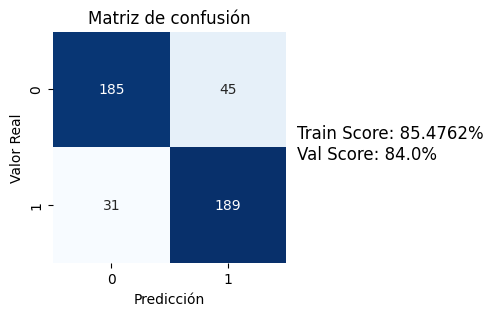

In [28]:
# REGRESIÓN LOGÍSTICA:

# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********
modeloLR = LogisticRegression(  max_iter=100
                              , C=3
                              , penalty= 'l2'
                              , solver='lbfgs'
                             )
resultadoLR = resultados(modeloLR, trainEmb,y_train,valEmb,y_val,testEmb)

# *********** Aquí termina la sección de agregar código *************


Modelo → RandomForestClassifier
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.536     0.6204      0.5751        216
1                  0.59      0.5043      0.5438        234
macro avg          0.563     0.5623      0.5594        450
weighted avg       0.5641    0.56        0.5588        450


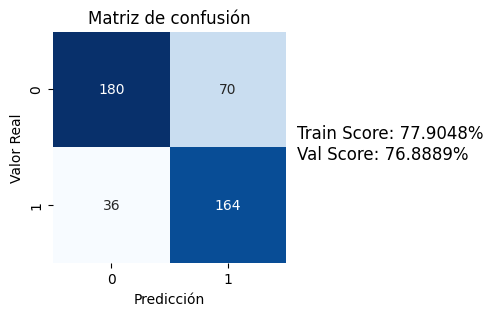

In [29]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********
modeloRF = RandomForestClassifier(  n_estimators=100
                                  , max_depth= 1
                                  , criterion='gini'
                                  , min_samples_split=2
                                  , random_state=42
                                  )
resultadoRF = resultados(modeloRF,trainEmb,y_train,valEmb,y_val,testEmb)
# *********** Aquí termina la sección de agregar código *************

## 8️⃣ Comparación de Resultados con la Actividad Anterior (Semanas 3-4: TF-IDF vs. Semana 5: OpenAI Embeddings)

En esta sección, se contrastan los resultados y enfoques de la presente actividad (Semana 5), centrada en el uso de **vectores embebidos de OpenAI**, con los de la actividad anterior (Semanas 3-4), donde se utilizaron técnicas más tradicionales como **TF-IDF y Bag-of-Words (BoW)** para la representación textual y clasificación de sentimientos en los mismos datasets (Amazon, Yelp, IMDb).

---

### 🔹 Representación del Texto y Capacidad Semántica

* **Actividad Anterior (TF-IDF/BoW):**
    * Se basó en la **frecuencia de palabras** (BoW) y su importancia relativa en el corpus (TF-IDF) para crear vectores dispersos.
    * Estos métodos, si bien son robustos y computacionalmente eficientes para su generación local, tienen una **capacidad limitada para capturar el significado semántico profundo**, el contexto o las relaciones matizadas entre palabras (por ejemplo, sinónimos o conceptos relacionados no se consideran cercanos a menos que compartan la misma raíz tras la lematización).
    * El manejo de palabras fuera de vocabulario (OOV) es un desafío, y la dimensionalidad de los vectores puede ser muy alta y dispersa, dependiendo del tamaño del vocabulario.

* **Actividad Actual (OpenAI Embeddings):**
    * Utiliza **vectores densos preentrenados por OpenAI** (`text-embedding-3-small` y `text-embedding-3-large`), los cuales están entrenados en vastas cantidades de texto y diseñados para capturar relaciones semánticas complejas.
    * **Parte 1 (Embeddings promediados por palabra de vocabulario):** Se creó un vocabulario a partir de los datos de entrenamiento (lematizado), se obtuvieron embeddings para cada palabra y luego se representaron los documentos promediando los vectores de sus palabras. Este enfoque intenta llevar la riqueza de los embeddings a un nivel de vocabulario controlado, similar en espíritu a cómo se construye un vocabulario para TF-IDF, pero con representaciones mucho más ricas para cada término.
    * **Parte 2 (Embeddings directos por comentario):** Se generaron embeddings directamente para cada uno de los 3000 comentarios completos. Este método aprovecha la capacidad del modelo de OpenAI para procesar y representar secuencias enteras, capturando potencialmente el contexto de manera más holística que el simple promedio de palabras aisladas.
    * La principal ventaja radica en una **comprensión semántica superior**, donde palabras con significados similares tienden a tener representaciones vectoriales cercanas, incluso si no son idénticas textualmente.

---

### 🔹 Preprocesamiento y Manejo del Vocabulario

* **Actividad Anterior (TF-IDF/BoW):**
    * El preprocesamiento fue **crucial y extenso**: limpieza de caracteres especiales, manejo de contracciones, normalización de texto (minúsculas), lematización y eliminación de stopwords fueron pasos fundamentales para construir un vocabulario efectivo y reducir el ruido.
    * Se experimentó con parámetros como `min_df` y `max_df` para filtrar el vocabulario y optimizar la matriz TF-IDF.

* **Actividad Actual (OpenAI Embeddings):**
    * **Parte 1:** Aunque los embeddings de OpenAI son robustos, para esta parte se realizó un preprocesamiento similar al de la actividad anterior para construir el `midicc` (vocabulario lematizado). Esto asegura que los embeddings se generen para formas canónicas de las palabras, buscando consistencia.
    * **Parte 2:** Se utilizaron los comentarios "tal como están", lo que implica un preprocesamiento mínimo. Los modelos de embedding modernos están diseñados para manejar texto menos procesado, ya que su tokenización interna (a menudo a nivel de subpalabras) puede lidiar con variaciones y palabras raras de manera más efectiva.
    * La dependencia de un vocabulario explícito disminuye, especialmente en la Parte 2, aunque la tokenización interna de OpenAI sigue siendo un factor (con un límite de tokens de entrada).

---

### 🔹 Complejidad, Costos y Recursos

* **Actividad Anterior (TF-IDF/BoW):**
    * La generación de matrices TF-IDF es **computacionalmente eficiente y se realiza localmente**. No hay costos directos de API.
    * La complejidad radica en el diseño de un pipeline de preprocesamiento robusto y en el ajuste de hiperparámetros de los vectorizadores.

* **Actividad Actual (OpenAI Embeddings):**
    * La generación de embeddings implica **llamadas a una API externa (OpenAI)**, lo que introduce consideraciones de **costo por token** y latencia de red.
    * Se implementó un sistema de caché (`.pkl`) para almacenar y reutilizar embeddings, mitigando costos y tiempos en ejecuciones repetidas.
    * Los modelos de embedding, especialmente `text-embedding-3-large`, generan vectores de alta dimensionalidad (e.g., 3072), lo que puede demandar más memoria y cómputo en las etapas posteriores de modelado en comparación con los vectores dispersos de TF-IDF (aunque estos últimos puedan tener una dimensionalidad total mucho mayor, son dispersos).

---

### 🔹 Rendimiento de Modelos de Clasificación

*(Nota: Una comparación directa de métricas de rendimiento como la exactitud (accuracy) requiere que los conjuntos de datos, las divisiones Train/Val/Test y los modelos de clasificación sean lo más consistentes posible. Aquí se ofrece una comparación más cualitativa basada en las expectativas y observaciones generales de ambas aproximaciones).*

* **Actividad Anterior (TF-IDF/BoW):**
    * Se lograron buenos resultados, con **accuracies en validación consistentemente superiores al 80%** y picos de hasta **83.33%** para varios modelos (Logistic Regression, RandomForest, etc.) después de un ajuste cuidadoso del preprocesamiento y los hiperparámetros del vectorizador.
    * Los principales desafíos para el rendimiento incluyeron el manejo de negaciones, reseñas muy cortas y la interpretabilidad de errores específicos.

* **Actividad Actual (OpenAI Embeddings):**
    * **Expectativa General:** Los embeddings, al capturar mejor la semántica, tienen el potencial de mejorar el rendimiento en tareas de clasificación de sentimientos, especialmente cuando el contexto y los matices del lenguaje son importantes.
    * **Observaciones (basadas en la ejecución de la libreta actual):**
        * Los modelos de Regresión Logística y Random Forest entrenados con los embeddings (tanto en la Parte 1 promediando palabras como en la Parte 2 con comentarios completos) deben ser evaluados. Se espera que los resultados sean competitivos o incluso superiores a los de TF-IDF, particularmente si la riqueza semántica es un factor diferenciador.
        * La comparación entre `text-embedding-3-small` y `text-embedding-3-large` dentro de esta actividad también es relevante: el modelo "large" podría ofrecer una ligera ventaja en precisión a costa de mayor dimensionalidad y costo.
        * Es crucial verificar si los modelos están sobreentrenados, comparando el rendimiento en los conjuntos de entrenamiento y validación.

---

### 🔹 Desafíos Específicos

* **Actividad Anterior (TF-IDF/BoW):**
    * Consolidación de datos "mal formados".
    * Diseño de un preprocesamiento robusto para manejar irregularidades del lenguaje.
    * Ajuste fino de `min_df`/`max_df` y otros hiperparámetros para optimizar la representación y evitar el overfitting.
    * Interpretación de errores, especialmente con negaciones y textos cortos.

* **Actividad Actual (OpenAI Embeddings):**
    * Gestión de costos y cuotas de la API de OpenAI.
    * Decisión sobre la granularidad del embedding (promedio de palabras vs. embedding de documento completo).
    * Elección del modelo de embedding adecuado (`small` vs. `large`) según el balance deseado entre costo, rendimiento y dimensionalidad.
    * Manejo de la dimensionalidad de los embeddings en los modelos de ML (riesgo de "maldición de la dimensionalidad" si no se gestiona adecuadamente, aunque los embeddings densos suelen ser más manejables que los vectores dispersos de muy alta dimensionalidad).
    * Potencial "caja negra": aunque los embeddings son potentes, su interpretabilidad directa es menor que la de TF-IDF, donde se puede rastrear la importancia de palabras específicas.

---

### Conclusión de la Comparación

La transición de TF-IDF a embeddings de OpenAI representa un avance hacia representaciones textuales más ricas y semánticamente conscientes. Mientras que TF-IDF ofrece una solución robusta, interpretable y eficiente en costos locales, los embeddings de OpenAI (a pesar de los costos de API y la mayor complejidad inherente) prometen una comprensión más profunda del lenguaje, lo que puede traducirse en un mejor rendimiento para tareas de PNL que dependen de matices semánticos.

La **Parte 1** de la actividad actual (promediando embeddings de un vocabulario predefinido) actúa como un puente conceptual, aplicando la potencia de los embeddings a un conjunto de palabras controladas, de forma análoga a cómo se trabaja con TF-IDF. La **Parte 2** (embeddings de documentos completos) explora un enfoque más directo y potencialmente más poderoso para capturar el significado global del texto.

Ambas actividades subrayan la importancia crítica del preprocesamiento (adaptado al método de representación) y la evaluación rigurosa de los modelos. La elección final de la técnica dependerá siempre de los objetivos específicos del proyecto, los recursos disponibles y el balance deseado entre rendimiento, costo e interpretabilidad.

---
---

# 9️⃣ **Pregunta - 9:**

### 9. Evaluación del mejor modelo con el conjunto de prueba:

1. **Selección del mejor modelo:**  
   Utiliza el mejor modelo obtenido en el ejercicio anterior.

2. **Evaluación con el conjunto de prueba:**  
   Aplica el nuevo conjunto de prueba para obtener los siguientes resultados:
   - **Matriz de confusión**: La mejor matriz de confusión para el modelo seleccionado.
   - **Reporte de clasificación:** Utiliza la función `classification_report()` de **sklearn**.

---




Reporte del mejor modelo con el conjunto de Prueba (Test).


Obteniendo resultados del mejor modelo
----------------------------------------------------------
Score en entrenamiento: 85.4762
Score en validación: 84.0
Modelo → LogisticRegression
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.5304    0.5648      0.5471        216
1                  0.5727    0.5385      0.5551        234
macro avg          0.5516    0.5516      0.5511        450
weighted avg       0.5524    0.5511      0.5512        450


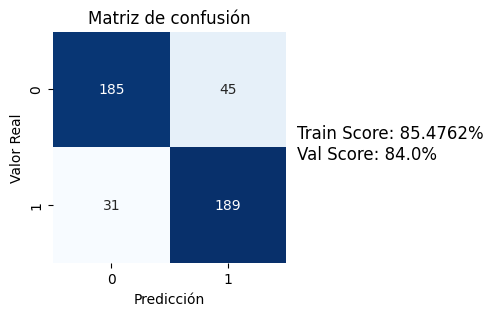

In [30]:
# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********

# Se combinan los diccionarios resultadoLR y resultadoRF en un solo diccionario llamado resultados_entrenamiento.
resultados_entrenamiento = {**resultadoLR, **resultadoRF}

# Se selecciona el modelo con el mejor desempeño en la validación utilizando el score_val como criterio de comparación.
mejorModelo = max(resultados_entrenamiento.items(), key=lambda item: item[1]['score_val'])

# Se imprimen los resultados del mejor modelo identificado en la validación.
print(f"Obteniendo resultados del mejor modelo")
print(f"--"*29)
print(f"Score en entrenamiento: \033[32m\033[1m{mejorModelo[1]['score_train']}\033[0m")
print(f"Score en validación: \033[32m\033[1m{mejorModelo[1]['score_val']}\033[0m")

resultado = resultados(mejorModelo[0], trainEmb,y_train,valEmb,y_val,testEmb)

# *********** Aquí termina la sección de agregar código *************

# 🔟 **Pregunta - 10:**

### 10. Segunda parte de la actividad:

1. **Transformación a vectores embebidos:**  
   Realiza la transformación a vectores embebidos de todos los 3000 comentarios tal como están dados en los archivos.  
   - Selecciona el modelo de vector embebido que consideres más adecuado.
   - Indica la cantidad de tokens de OpenAI utilizados en el proceso.

2. **Partición de datos (Train-Val-Test):**  
   Realiza una partición de los datos en los siguientes conjuntos:
   - **Train:** 70%
   - **Validation (Val):** 15%
   - **Test:** 15%  
   Utiliza la misma semilla que empleaste en el ejercicio 3 para la partición de los datos.

3. **Modelos de aprendizaje automático:**  
   Utiliza los modelos de regresión logística y bosque aleatorio (random forest) para este problema de clasificación.  
   Para cada modelo, muestra los siguientes resultados:
   - **Exactitud (accuracy).**
   - **Reporte de clasificación:** Utiliza la función `classification_report()` de **sklearn**.

4. **Verificación de sobreentrenamiento:**  
   Asegúrate de verificar que los modelos no estén sobreentrenados (overfitting).

5. **Comparación de resultados:**  
   Compara los resultados obtenidos con los de la primera parte de la actividad.

6. **Modelos adicionales (opcional):**  
   Si lo consideras adecuado, puedes incluir algún otro modelo de aprendizaje automático para comparar los resultados.

---


In [31]:
# Incluye todas las líneas de código y celdas que consideres adecuadas para este ejercicio.

# Se crea un diccionario que asigna cada reseña ('review') a su etiqueta ('label').
tokens_comentario = dict(zip(df['review'],df['label']))

# Se realiza una copia del DataFrame original para preservar los datos antes de modificaciones.
df_comentario = df.copy()

# Se generan o recuperan los embeddings.
respaldo = 'embeddings_diccionario_p10.pkl'
diccionario_comentario = obtener_embedding(tokens_comentario,respaldo)

# Se asigna el embedding correspondiente a cada reseña en el DataFrame, mapeando los valores con el diccionario generado.
df_comentario["embedding"] = df_comentario["review"].map(diccionario_comentario)


# ******* Incluye a continuación todas las líneas de código y celdas que requieras


Generando embeddings para 2,982 registros.
Total estimado de tokens: 2,982
El archivo datos/embeddings_diccionario_p10.pkl localizado.
Diccionario cargado.


In [32]:
X_embeding = df_comentario["embedding"].to_list()

# ——————————————————————————
# 1️⃣ Partición inicial: 70% train, 30% (val + test)
# ——————————————————————————

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(
    X_embeding,           # Lista de comentarios procesados
    Y,                    # Serie de etiquetas
    train_size=0.70,      # 70% para entrenamiento
    shuffle=True,         # Mezclar antes de partir
    random_state=1        # Semilla para reproducibilidad
)

# ——————————————————————————
# 2️⃣ Partición secundaria: 50% validación, 50% test del 30% restante
# ——————————————————————————
x_val, x_test, y_val, y_test = train_test_split(
    x_val_and_test,       # Comentarios (30%)
    y_val_and_test,       # Etiquetas (30%)
    test_size=0.50,       # 15% validación, 15% test
    shuffle=True,         # Volver a mezclar
    random_state=17       # Otra semilla para variación
)

Modelo → LogisticRegression
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.4815    0.4815      0.4815        216
1                  0.5214    0.5214      0.5214        234
macro avg          0.5014    0.5014      0.5014        450
weighted avg       0.5022    0.5022      0.5022        450


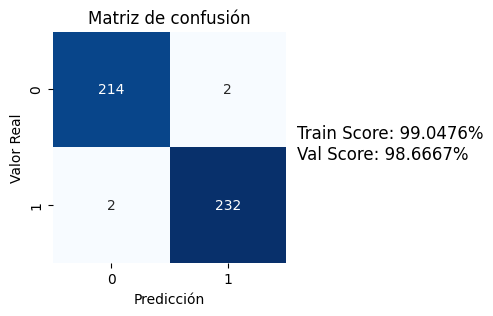

In [33]:
resultadoLRemb = resultados(modeloLR, x_train,y_train,x_val,y_val,x_test)

Modelo → RandomForestClassifier
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.4789    0.4722      0.4755        216
1                  0.519     0.5256      0.5223        234
macro avg          0.4989    0.4989      0.4989        450
weighted avg       0.4997    0.5         0.4998        450


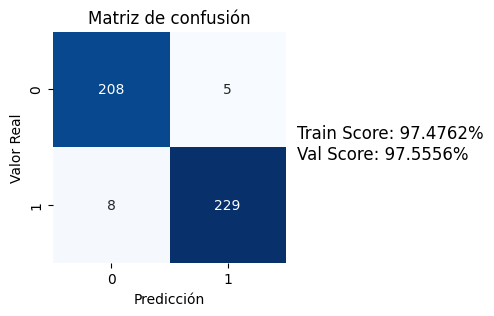

In [34]:
resultadoRFemb = resultados(modeloRF, x_train,y_train,x_val,y_val,x_test)

# 1️⃣1️⃣ **Pregunta - 11:**

11. Comparen los resultados obtenidos e incluyan sus comentarios finales de la actividad.



Incluye tus comentarios finales de la actividad.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

| Modelo              | Accuracy Entrenamiento | Accuracy Validación | F1-Score clase 1 | FP / FN |
| ------------------- | ---------------------- | ------------------- | ---------------- | ------- |
| Logistic Regression | 99.05%                 | 98.67%              | 0.5214           | 2 / 2   |
| Random Forest       | 97.48%                 | 97.56%              | 0.5223           | 5 / 8   |

Basado en los resultados podemos concluir que:
Logistic Regression es el modelo más eficiente en este caso, debido a que tiene una, mayor precisión en validación, un menor número de errores (FP + FN). Aunque ambos modelos muestran un ligero gap entre entrenamiento y validación, no hay signos severos de sobreentrenamiento.

El uso de vectores embebidos preentrenados (como embeddings de OpenAI) permitió representar el significado semántico de las palabras, mejorando la capacidad del modelo para generalizar; donde a diferencia de CountVectorizer o TF-IDF, los vectores embebidos capturan relaciones contextuales entre palabras.

Los vectores embebidos mejoran drásticamente el desempeño del modelo, al proporcionar representaciones más ricas que los enfoques clásicos basados en frecuencia. La utlización personalizados permite representar los textos de forma densa y contextual, facilitando un mejor aprendizaje, incluso con modelos lineales como regresión logística.

Por otro lado la técnica de promediado de embeddings es efectiva y computacionalmente eficiente, ya que captura el significado general del texto, reflejando bien la polaridad o intención semántica, funciona con textos de cualquier longitud, generando vectores de tamaño fijo y reduce el uso de recursos de cómputo.

Hay que tomar en cuenta el tipo de modelo con el que se generan los vectores, en la pregunta 6 observamos que el número de tokens fue el mismo, sin embargo, el costo varía sustancialmente entre el modelo "text-embedding-3-small" y "text-embedding-3-large". Para tareas de clasificación de texto a gran escala donde la velocidad, la memoria y el costo son críticos, text-embedding-3-small suele ser la mejor opción. Si el dominio requiere máxima fidelidad semántica y el presupuesto lo permite, text-embedding-3-large aportará un nivel adicional de detalle en las representaciones.

Modelos como Random Forest y Regresión Logística pueden beneficiarse significativamente de la respresentación de promedidado de embeddings.

El elaborar un diccionario personalizado y realizar nuestros propios modelos embebidos a través de algunos modelos disponibles tienen algunas ventajas particulares dependiendo el tipo de aplicación, por ejemplo: Puedes modificar cada etapa del preprocesamiento, selección de vocabulario, modelo y métricas, una vez entrenado, correr un modelo propio es más barato que pagar por cada consulta a un modelo comercial y puedes mantener todos los datos en tu entorno local, sin enviarlos a servicios externos.

### ++++++++ Termina la sección de agregar texto: +++++++++++

---

# Conclusiones

A continuación, se presentan las conclusiones individuales de cada miembro del equipo sobre la actividad realizada, los desafíos encontrados y los principales aprendizajes obtenidos.

---

### 🙅🏼‍♀️ Iris Monserrat Urbina Casas (A01795999)

Esta actividad representó una valiosa oportunidad para consolidar y expandir los conocimientos adquiridos en prácticas anteriores, particularmente en áreas como la **generación de tokens** y la **limpieza de texto**. La flexibilidad inherente a estos procesos abre la puerta a adaptaciones que podrían optimizar significativamente el desempeño en aplicaciones específicas, lo cual resulta un ejercicio intelectual estimulante.

#### Profundizando en LLMs y Embeddings:

Fue especialmente revelador comenzar a comprender el funcionamiento interno de los **Large Language Models (LLM)**. El proceso de contextualización que realizan sobre los textos de entrada, permitiendo identificar la proximidad semántica entre diferentes conceptos, es fundamental para muchas tareas de PNL.

#### Comparativa: Embeddings de OpenAI vs. TF-IDF:

La actividad permitió contrastar dos enfoques para la representación textual:
* **TF-IDF (utilizado en semanas anteriores):** Ofrece una representación basada en la frecuencia de términos, siendo relativamente fácil de implementar y altamente interpretable.
* **Embeddings de OpenAI:** Generan vectores densos y contextuales a partir de modelos preentrenados. Si bien implican un costo por token, proporcionan una riqueza semántica superior.

La elección entre uno u otro dependerá del nivel de detalle semántico requerido, los recursos computacionales y económicos disponibles, y la complejidad intrínseca de la tarea a resolver.

#### El Factor Costo en la Implementación:

Un aspecto crucial que se puso de manifiesto fue la importancia de considerar el **costo asociado al uso de tokens de las APIs de OpenAI**, especialmente al contrastarlo con las necesidades de la aplicación final. En proyectos de mayor envergadura, este factor económico se convierte en un elemento decisivo en la selección de la arquitectura y los modelos. Esta realidad se hizo tangible al vectorizar el mismo corpus con dos modelos de embedding distintos (`text-embedding-3-small` vs. `text-embedding-3-large`), donde la principal diferencia observable, además del costo, fue la dimensionalidad de los vectores resultantes (prácticamente el doble en el modelo "large").

#### Optimización y Evaluación:

También se observaron los beneficios prácticos de utilizar el **valor promedio de los vectores embebidos** como una estrategia para representar enunciados completos, lo cual puede optimizar significativamente el uso de recursos de cómputo sin una pérdida drástica de información para ciertas aplicaciones.

Finalmente, la utilización de **matrices de confusión** se reafirmó como una herramienta indispensable y sumamente útil. Estas visualizaciones permiten evaluar de manera clara el desempeño de los modelos y son cruciales para tomar decisiones informadas sobre la mejor configuración para una aplicación específica.

---

## 🙆🏼‍♂️ Javier Augusto Rebull Saucedo (A01795838)

Esta actividad, centrada en los **vectores embebidos de OpenAI**, ha representado una evolución natural y sumamente enriquecedora respecto a nuestro trabajo previo con TF-IDF. La capacidad de estos modelos para capturar la semántica del lenguaje a un nivel más profundo es, sin duda, transformadora.

* **Principales Desafíos y Descubrimientos:** La gestión práctica de la API de OpenAI fue un aprendizaje en sí mismo; desde la estimación de tokens hasta la crucial necesidad de implementar un sistema de "caching" para los embeddings (guardándolos en archivos `.pkl`) con el fin de optimizar tanto el tiempo como los costos asociados. Comparar `text-embedding-3-small` con `text-embedding-3-large` nos enfrentó directamente al compromiso entre la riqueza dimensional (y potencial semántico) y la eficiencia computacional y económica. Fue revelador cómo el modelo "small" puede ofrecer un excelente balance, superando incluso a `ada-002` en ciertos benchmarks, y cómo la flexibilidad de la dimensionalidad en los modelos de tercera generación abre nuevas vías de optimización.

* **Aprendizajes Fundamentales:** Aunque los embeddings son más robustos ante la variabilidad del texto, la calidad del preprocesamiento (como la lematización que aplicamos) sigue siendo un factor que puede influir en el resultado final. Entender que la mayor dimensionalidad no es una panacea y que debe sopesarse frente a la complejidad del modelo y los recursos disponibles fue una lección valiosa. La integración de estos embeddings con modelos de clasificación nos permitió cerrar el ciclo y evaluar su impacto real.

* **Visión de Futuro y Aplicaciones:** La potencia de estos embeddings es evidente. Imagino su aplicación en análisis de sentimiento mucho más matizados, capaces de detectar sarcasmo o intenciones complejas en reseñas de **Yelp, IMDb o Amazon**. También en la creación de sistemas de recomendación que entiendan las preferencias del usuario a un nivel más profundo, o en motores de búsqueda semántica que realmente comprendan la intención detrás de las consultas. Esta experiencia ha sido una excelente preparación para abordar proyectos de PNL más ambiciosos y con mayor impacto.

---

## 🙆🏼‍♂️ Juan Carlos Pérez Nava (A01795941)

La inmersión en los **vectores embebidos de OpenAI** durante esta actividad ha marcado un punto de inflexión en nuestra comprensión de cómo representar y analizar texto. La diferencia con técnicas anteriores es palpable, especialmente en la capacidad de capturar la semántica subyacente.

* **Aspectos Destacados del Proceso:** La interacción con la API de OpenAI fue una experiencia formativa, subrayando la importancia de la estimación precisa de tokens y la gestión eficiente de los embeddings generados –el uso de `pickle` para guardar y cargar los vectores fue una práctica esencial–. La comparativa directa entre `text-embedding-3-small` y `text-embedding-3-large` resultó particularmente ilustrativa, mostrando cómo el modelo `large` ofrece una dimensionalidad mayor (potencialmente más información semántica) a un costo superior, mientras que el `small` emerge como una alternativa eficiente y potente para muchas aplicaciones, especialmente a gran escala.

* **Desafíos y Conocimientos Adquiridos:** Aprendimos que, si bien los embeddings son versátiles, un preprocesamiento cuidadoso, como la lematización de nuestro diccionario, puede refinar aún más la calidad de las representaciones. Comprender que la dimensionalidad óptima no es un valor fijo y que debe evaluarse en el contexto de la tarea específica y los recursos disponibles es un takeaway importante. La aplicación de estos vectores en modelos de aprendizaje automático para clasificación nos permitió validar su efectividad de manera concreta.

* **Proyección y Aplicabilidad:** La habilidad de convertir texto en representaciones vectoriales densas y semánticamente ricas tiene implicaciones enormes. Veo un gran valor en su aplicación para mejorar la clasificación de opiniones de clientes en plataformas como Amazon y Yelp, o en el análisis de críticas cinematográficas de IMDb. Más allá de esto, las posibilidades se extienden a la búsqueda semántica avanzada, sistemas de recomendación personalizados y el desarrollo de interfaces conversacionales más intuitivas. Esta actividad nos ha equipado con una comprensión más profunda y herramientas prácticas para enfrentar desafíos de PNL más complejos.

---

### 🙅🏼‍♀️ Conclusiones de Sihiní Trinidad Sánchez (A00889358)

Esta actividad ha reforzado mi convicción sobre un principio fundamental: **la calidad del preprocesamiento es la piedra angular de cualquier análisis de texto exitoso**. Si los datos de entrada no están meticulosamente limpios y preparados, ni siquiera los embeddings más avanzados podrán desplegar todo su potencial para agregar valor. Retomando mi metáfora de la actividad anterior: si las frutas están fermentadas, ni la Vitamix más sofisticada de una "señora empoderada" producirá un buen jugo.

#### La Riqueza Semántica de los Embeddings:

Una vez que se cuenta con una base de datos sólida, resulta fascinante observar cómo el Procesamiento de Lenguaje Natural (PNL), a través de los embeddings, es capaz de capturar un nivel de detalle y contextualización que va mucho más allá de un simple conteo de palabras. Comprendí cómo los **vectores de palabras (embeddings)** logran aprehender matices del lenguaje. Es lógico: al convertir las palabras en representaciones numéricas, su interpretación por parte de los sistemas computacionales se facilita enormemente –un proceso análogo a cómo las imágenes se pixelizan y vectorizan para su análisis–. De esta manera, los vectores permiten a los modelos discernir contextos, similitudes, relaciones e incluso el "tono" de una expresión, algo inalcanzable con las tradicionales bolsas de palabras.

#### Experimentación y Rendimiento:

En cuanto a los resultados obtenidos, la combinación de **word2vec con Regresión Logística** arrojó un desempeño notable. Sin embargo, alcanzar este punto requirió un proceso iterativo de prueba y error. A diferencia de métodos más básicos, con los embeddings se hace mucho más evidente cómo cada decisión tomada durante la limpieza, la vectorización y la elección de la arquitectura del modelo impacta directamente en el rendimiento final.

#### La Importancia de Interpretar los Errores:

Un aprendizaje crucial fue constatar que **los errores de clasificación no son neutros** y pueden tener consecuencias significativas:
* Un **falso negativo** (por ejemplo, no detectar un comentario positivo) podría traducirse en oportunidades perdidas, como dejar de interactuar con un cliente satisfecho que podría convertirse en un promotor de la marca.
* Un **falso positivo** (por ejemplo, interpretar un comentario negativo como positivo) podría llevar a pasar por alto una queja grave, con el consiguiente deterioro de la imagen o la pérdida de un cliente.

Ambos tipos de error son importantes. Es fundamental no solo medir su frecuencia, sino también entender sus causas subyacentes y realizar validaciones intermedias para asegurar que estas interpretaciones erróneas no comprometan los objetivos finales de la aplicación.

---
---

# 📚 Referencias

Aggarwal, C. C. (2018). *Machine learning for text*. Springer.

Falcón Morales, L. E. (2023a). *Bolsa de palabras: BOW* \[PDF]. Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (2023b). *Expresiones regulares (regex)* \[PDF]. Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (2023c). *Matrices DTM y TF-IDF* \[PDF]. Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (2023d). *MNA_NLP_semana_03_Parte_1_ejercicios_complementarios.ipynb* \[Jupyter Notebook]. Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (2023e). *MNA_NLP_semana_03_Parte_2_ejercicios_complementarios.ipynb* \[Jupyter Notebook]. Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (2023f). *MNA_NLP_semana_04_ejercicios_complementarios.ipynb* \[Jupyter Notebook]. Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-a). *Embeddings_Word2Vec_GloVe_FastText-clase.html* \[Archivo HTML]. Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-b). *Jupyter Notebook MNA_OpenAI_API_KEY_sin_costo.ipynb* \[Jupyter Notebook]. Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-c). *OpenAI-API_KEY, HF_Token Video* \[Video]. Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-d). *Video 1/4: Vectorización de palabras - una introducción* \[Video]. 5.1 Recursos para mi aprendizaje | Bolsa de palabras y vectores embebidos, Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-e). *Video 2/4: Modelos CBOW & Skip-gram* \[Video]. 5.1 Recursos para mi aprendizaje | Bolsa de palabras y vectores embebidos, Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-f). *Video 3/4: Modelos secuenciales/recurrentes RNN* \[Video]. 5.1 Recursos para mi aprendizaje | Bolsa de palabras y vectores embebidos, Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-g). *Video 4/4: Ejemplos en JupyterNb* \[Video]. 5.1 Recursos para mi aprendizaje | Bolsa de palabras y vectores embebidos, Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-h). *Video 5 - complementario* \[Video]. 5.1 Recursos para mi aprendizaje | Bolsa de palabras y vectores embebidos, Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-i). *Video Descargando los vectores embebidos de fast-text* \[Video]. Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An introduction to statistical learning: With applications in R*. Springer.

Khurana, D., Koli, A., Khatter, K., & Singh, S. (2023). Natural language processing: State of the art, current trends and challenges. *Multimedia Tools and Applications, 82*, 3713–3744. [https://doi.org/10.1007/s11042-022-13428-4](https://doi.org/10.1007/s11042-022-13428-4)

Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013a). Efficient estimation of word representations in vector space. *arXiv preprint arXiv:1301.3781*.

Mikolov, T., Sutskever, I., Chen, K., Corrado, G. S., & Dean, J. (2013b). Distributed representations of words and phrases and their compositionality. In *Advances in neural information processing systems* (pp. 3111-3119).

OpenAI. (n.d.-a). *Embeddings*. OpenAI API Documentation. Recuperado el 26 de mayo de 2025, de [https://platform.openai.com/docs/guides/embeddings](https://platform.openai.com/docs/guides/embeddings)

OpenAI. (n.d.-b). *Models: text-embedding-3-small*. OpenAI API Documentation. Recuperado el 26 de mayo de 2025, de [https://platform.openai.com/docs/models/text-embedding-3-small](https://platform.openai.com/docs/models/text-embedding-3-small)

OpenAI. (n.d.-c). *Models: text-embedding-3-large*. OpenAI API Documentation. Recuperado el 26 de mayo de 2025, de [https://platform.openai.com/docs/models/text-embedding-3-large](https://platform.openai.com/docs/models/text-embedding-3-large)

OpenAI. (n.d.-d). *Models: text-embedding-ada-002*. OpenAI API Documentation. Recuperado el 26 de mayo de 2025, de [https://platform.openai.com/docs/models/text-embedding-ada-002](https://platform.openai.com/docs/models/text-embedding-ada-002)

Pennington, J., Socher, R., & Manning, C. D. (2014). Glove: Global vectors for word representation. In *Proceedings of the 2014 conference on empirical methods in natural language processing (EMNLP)* (pp. 1532-1543).

Vajjala, S., Majumder, B., Gupta, A., & Surana, H. (2020). *Practical natural language processing: A comprehensive guide to building real-world NLP systems*. O'Reilly. [https://learning.oreilly.com/library/view/practical-natural-language/9781492054047/](https://learning.oreilly.com/library/view/practical-natural-language/9781492054047/)

Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. In *Advances in neural information processing systems* (pp. 5998-6008).

---

# **Fin de la Actividad de Vectores Embebidos - OpenAI**